In [2]:
# important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import requests
pd.set_option('display.max_columns',21)

The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

1.Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.


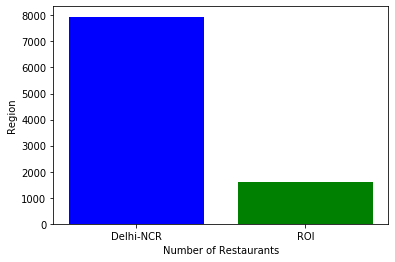

In [3]:
df = pd.read_csv('zomato.csv', encoding='latin-1',index_col='Restaurant ID')
city = ['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad']
Number_Delhi_NCR = df.loc[ df['City'].isin(city)].count().iloc[0]
Number_Rest = df.loc[ ~df['City'].isin(city)].count().iloc[0]
plt.bar( ['Delhi-NCR','ROI'] ,[Number_Delhi_NCR,Number_Rest] ,color=['Blue','Green'] )
plt.xlabel('Number of Restaurants')
plt.ylabel('Region')
plt.show()

2.Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.


In [5]:
df = pd.read_csv('zomato.csv', encoding='latin-1',index_col='Restaurant ID')
total_cusines = []
for i in df.loc[df['Country Code'] == 1 & df['City'].isin(city) , 'Cuisines']:
    if ',' in i:
        for j in i.split(','):
            total_cusines.append(j.strip())
    else:
        total_cusines.append(i.strip())

np_total_delhi = np.array(total_cusines)
unique  = np.unique(np_total_delhi)
delhi = set(unique)

rest_cusines = []

for i in df.loc[df['Country Code'] == 1 & ~df['City'].isin(city) ,'Cuisines' ]:
    if ',' in i:
        for j in i.split(','):
            rest_cusines.append(j.strip())
    else:
        rest_cusines.append(i.strip())
np_rest_cusines = np.array(rest_cusines)
unique  = np.unique(np_rest_cusines)
rest = set(unique)

for i in rest.difference(delhi):
    print(i)

Malwani
German
Cajun
BBQ


In [6]:
# Verfication Using Zomato API
response =requests.get('https://developers.zomato.com/api/v2.1/cuisines',
                      params={
                          'city_id':1  # Delhi
                      },headers = {
                          'user-key':'744b1ffcc052dd3e2b54ec2262d406d2'
                      }
                      )
data = response.json()
Diff=rest.difference(delhi)
for i in data['cuisines']:
    if i['cuisine']['cuisine_name'] in Diff:
        print('Wrong DataSet')
        break

Wrong DataSet


3.Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.


In [7]:
df = pd.read_csv('zomato.csv', encoding='latin-1',index_col='Restaurant ID')
df.dropna(subset=['Cuisines'],inplace = True)
def f(s):
    if ',' in s:
        a = s.split(',')
        for i in range(len(a)):
            a[i] = a[i].strip()
        return a 
    else:
        return [s.strip()]
print('******* DELHI_NCR ********')
total_cusines = df.loc[df['Country Code'] == 1 & df['City'].isin(city),'Cuisines'].apply(f)
d={}
for i in total_cusines:
    for j in i:
        d[j]= d.get(j,0) + 1
d = sorted(d.items(),key = lambda x:x[1],reverse=True)[:10]
for k in d:
    print(k[0])

print('******* ROI **********')
total_cusines = df.loc[df['Country Code'] == 1 & ~df['City'].isin(city),'Cuisines'].apply(f)
d={}
for i in total_cusines:
    for j in i:
        d[j]= d.get(j,0) + 1
d = sorted(d.items(),key = lambda x:x[1],reverse=True)[:10]
for k in d:
    print(k[0])

******* DELHI_NCR ********
North Indian
Chinese
Fast Food
Mughlai
Bakery
South Indian
Continental
Desserts
Street Food
Italian
******* ROI **********
North Indian
Chinese
Continental
Italian
Cafe
Fast Food
South Indian
Mughlai
Desserts
Mexican


4.Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

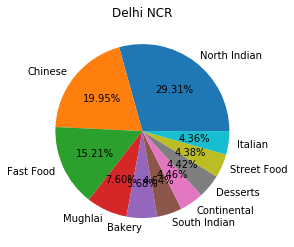

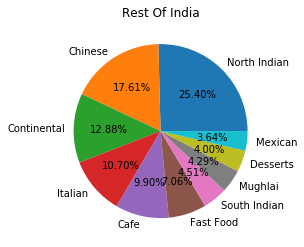

In [8]:
total_cusines = df.loc[df['Country Code'] == 1 & df['City'].isin(city),'Cuisines'].apply(f)
d={}
for i in total_cusines:
    for j in i:
        d[j]= d.get(j,0) + 1
d = sorted(d.items(),key = lambda x:x[1],reverse=True)[:10]
d=dict(d)
plt.title('Delhi NCR')
plt.pie( d.values() , labels=d.keys() ,autopct='%.2f%%' )
plt.show()

total_cusines = df.loc[df['Country Code'] == 1 & ~df['City'].isin(city),'Cuisines'].apply(f)
d={}
for i in total_cusines:
    for j in i:
        d[j]= d.get(j,0) + 1
d = sorted(d.items(),key = lambda x:x[1],reverse=True)[:10]
d=dict(d)
plt.title('Rest Of India')
plt.pie( d.values() , labels=d.keys() ,autopct='%.2f%%' )
plt.show()

# In delhi NCR Fast Food Cusine,Mughalai,Bakery is more Famous than  ROI's Continetial,Itailian,Cafe Food Cusine

User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

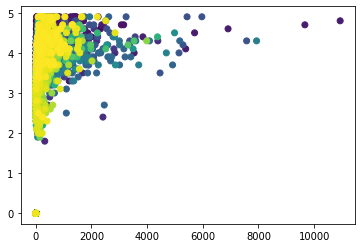

In [9]:
df = pd.read_csv('zomato.csv', encoding='latin-1',index_col='Restaurant ID')
plt.scatter(df['Votes'] , df['Aggregate rating'] ,c=np.arange(len(df['Votes'])) )
plt.show()

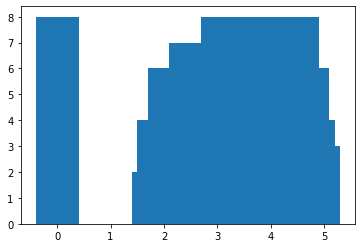

In [15]:
df = pd.read_csv('zomato.csv', encoding='latin-1',index_col='Restaurant ID')
df.dropna(subset=['Cuisines'],inplace=True)
def f(s):
    if ',' in s:
        return len(s.split(','))
    else:
        return 1;
df['Number_Of_Cusines'] = df['Cuisines'].apply(f)

plt.bar( df['Aggregate rating'] , df['Number_Of_Cusines'] )
plt.show()

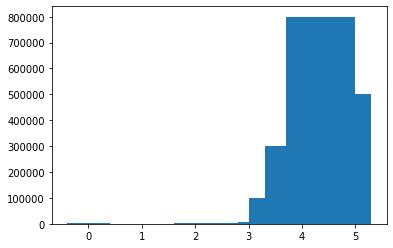

In [19]:
df = pd.read_csv('zomato.csv', encoding='latin-1',index_col='Restaurant ID')
plt.bar(df['Aggregate rating'],df['Average Cost for two']  )
plt.show()
# Higher The Avg Cost Highest The Rating

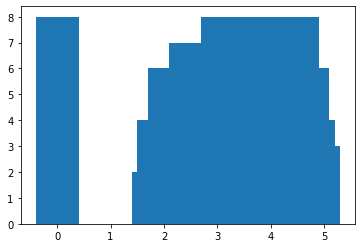

In [23]:
df = pd.read_csv('zomato.csv', encoding='latin-1',index_col='Restaurant ID')
df.dropna(subset=['Cuisines'],inplace=True)
def f(s):
    if ',' in s:
        return len(s.split(','))
    else:
        return 1;
df['Number_Of_Cusines'] = df['Cuisines'].apply(f)

plt.bar(df.loc[df['Number_Of_Cusines'] >1,'Aggregate rating'] , df.loc[df['Number_Of_Cusines'] >1,'Number_Of_Cusines'] )
plt.show()

Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [41]:
df = pd.read_csv('zomato.csv', encoding='latin-1',index_col='Restaurant ID')
group_locality = df.groupby('Locality')
Total_Votes=group_locality['Votes'].apply(sum)
df['Individual_sum'] = df['Votes'] * df['Aggregate rating']
Total_Votes_Rating = group_locality['Individual_sum'].apply(sum)
Weighted_Rating = Total_Votes_Rating/Total_Votes
for i in range(len(Weighted_Rating.nlargest(10))):
    print(Weighted_Rating.nlargest(10).index[i])

Aminabad
Barwa Towers, Al Sadd
Beak Street, Soho
Bebek
Bishopsgate, City Of London
Caddebostan
Cengkareng
City and Suburban
DIFC
Deira City Centre Area


In [45]:
df = pd.read_csv('zomato.csv', encoding='latin-1',index_col='Restaurant ID')
value = df['Restaurant Name'].value_counts()[:10]
for  i in range( len(value) ):
    print( value.index[i] , value[0]  )

Cafe Coffee Day 83
Domino's Pizza 83
Subway 83
Green Chick Chop 83
McDonald's 83
Keventers 83
Pizza Hut 83
Giani 83
Baskin Robbins 83
Barbeque Nation 83


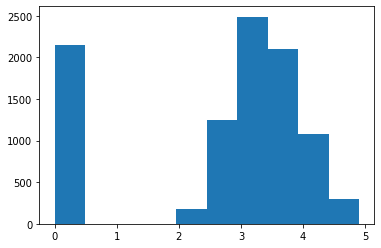

In [53]:
plt.hist(df['Aggregate rating'])
plt.show()


Toit 10934
Truffles 9667
Hauz Khas Social 7931
Peter Cat 7574
AB's - Absolute Barbecues 6907
Barbeque Nation 5966
Big Brewsky 5705
AB's - Absolute Barbecues 5434
The Black Pearl 5385
BarBQ 5288


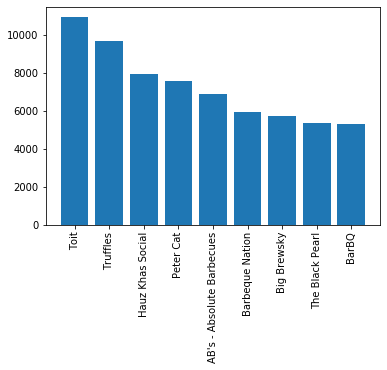

In [72]:
df = pd.read_csv('zomato.csv', encoding='latin-1',index_col='Restaurant ID')
largest = df['Votes'].nlargest(10)
for i in largest.index:
    print( df['Restaurant Name'].loc[i] , largest[i] )
plt.bar( [df['Restaurant Name'].loc[i] for i in  largest.index ] , largest ) 
plt.xticks(rotation=90)
plt.show()

******* USA ********


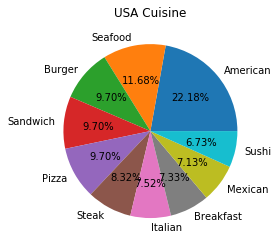

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,,,,,,,,,,,,,,,,,,,,
6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661


In [80]:
df = pd.read_csv('zomato.csv', encoding='latin-1',index_col='Restaurant ID')
df.dropna(subset=['Cuisines'],inplace = True)
def f(s):
    if ',' in s:
        a = s.split(',')
        for i in range(len(a)):
            a[i] = a[i].strip()
        return a 
    else:
        return [s.strip()]
print('******* USA ********')
total_cusines = df.loc[df['Country Code'] == 216 ,'Cuisines'].apply(f)
d={}
for i in total_cusines:
    for j in i:
        d[j]= d.get(j,0) + 1
d = sorted(d.items(),key = lambda x:x[1],reverse=True)[:10]
d =dict(d)
plt.pie( d.values() ,labels =  d.keys(), autopct='%.2f%%' )
plt.title('USA Cuisine')
plt.show()
df

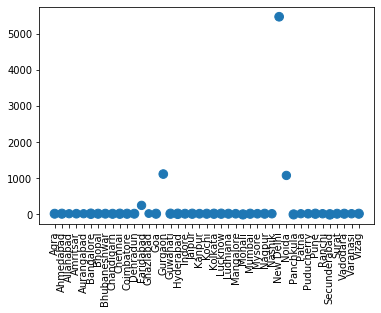

In [114]:
df = pd.read_csv('zomato.csv', encoding='latin-1',index_col='Restaurant ID')
df = df.loc[df['Country Code'] == 1]
group_locality = df.groupby('City')
Total_Votes=group_locality['Votes'].apply(sum)
df['Individual_sum'] = df['Votes'] * df['Aggregate rating']
Total_Votes_Rating = group_locality['Individual_sum'].apply(sum)
Weighted_Rating = Total_Votes_Rating/Total_Votes
x_y= df['City'].value_counts().sort_index()
s = Weighted_Rating.sort_index()
plt.xticks(rotation=90)
plt.scatter(x_y.index , x_y ,  s=Weighted_Rating*20 )
plt.show()